In [2]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [3]:
f = h5py.File('GW170817_GWTC-1.hdf5', 'r')
events = f['IMRPhenomPv2NRT_lowSpin_posterior']

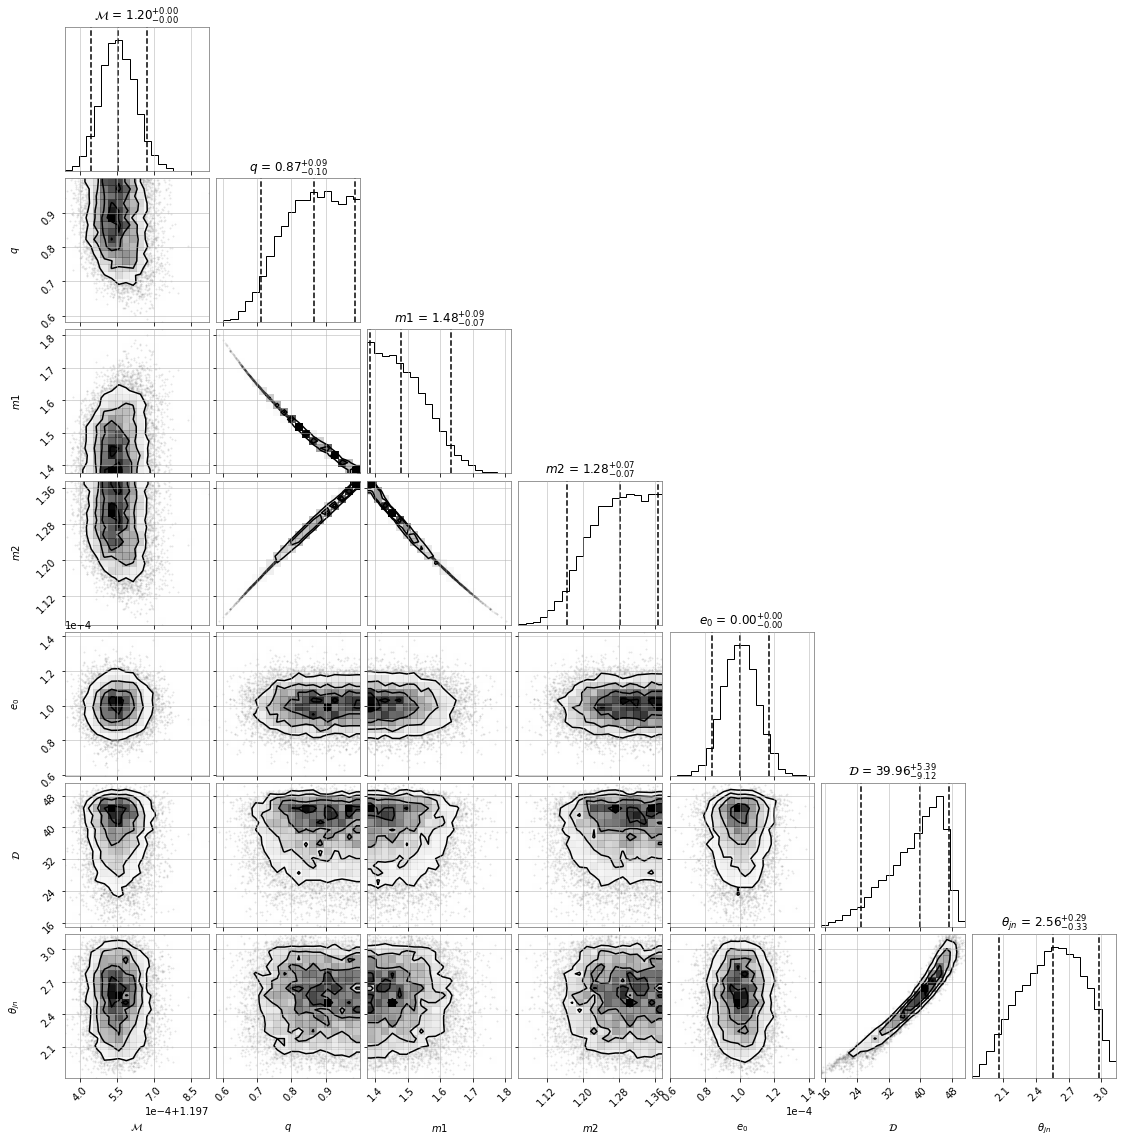

In [4]:
m11 = np.array(events['m1_detector_frame_Msun'])
m21 = np.array(events['m2_detector_frame_Msun'])
chirp_mass1 = ( (m11*m21)**(3/5) )/( (m11+m21)**(1/5) )
D1 = np.array(events['luminosity_distance_Mpc'])
theta_jn1 = np.arccos(np.array(events['costheta_jn']))
mass_ratio1 = m21/m11
e01 = np.random.normal(0.0001, 0.00001, len(m11))

m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)

data1 = np.transpose(np.array([chirp_mass1,mass_ratio1,m11,m21,e01,D1,theta_jn1]))
figure = corner.corner(data1, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [6]:
result2 = bilby.result.read_in_result("TaylorF2EccFD20Hz_spinfixed_data0_1187008882-43_analysis_H1L1V1_result.hdf5")

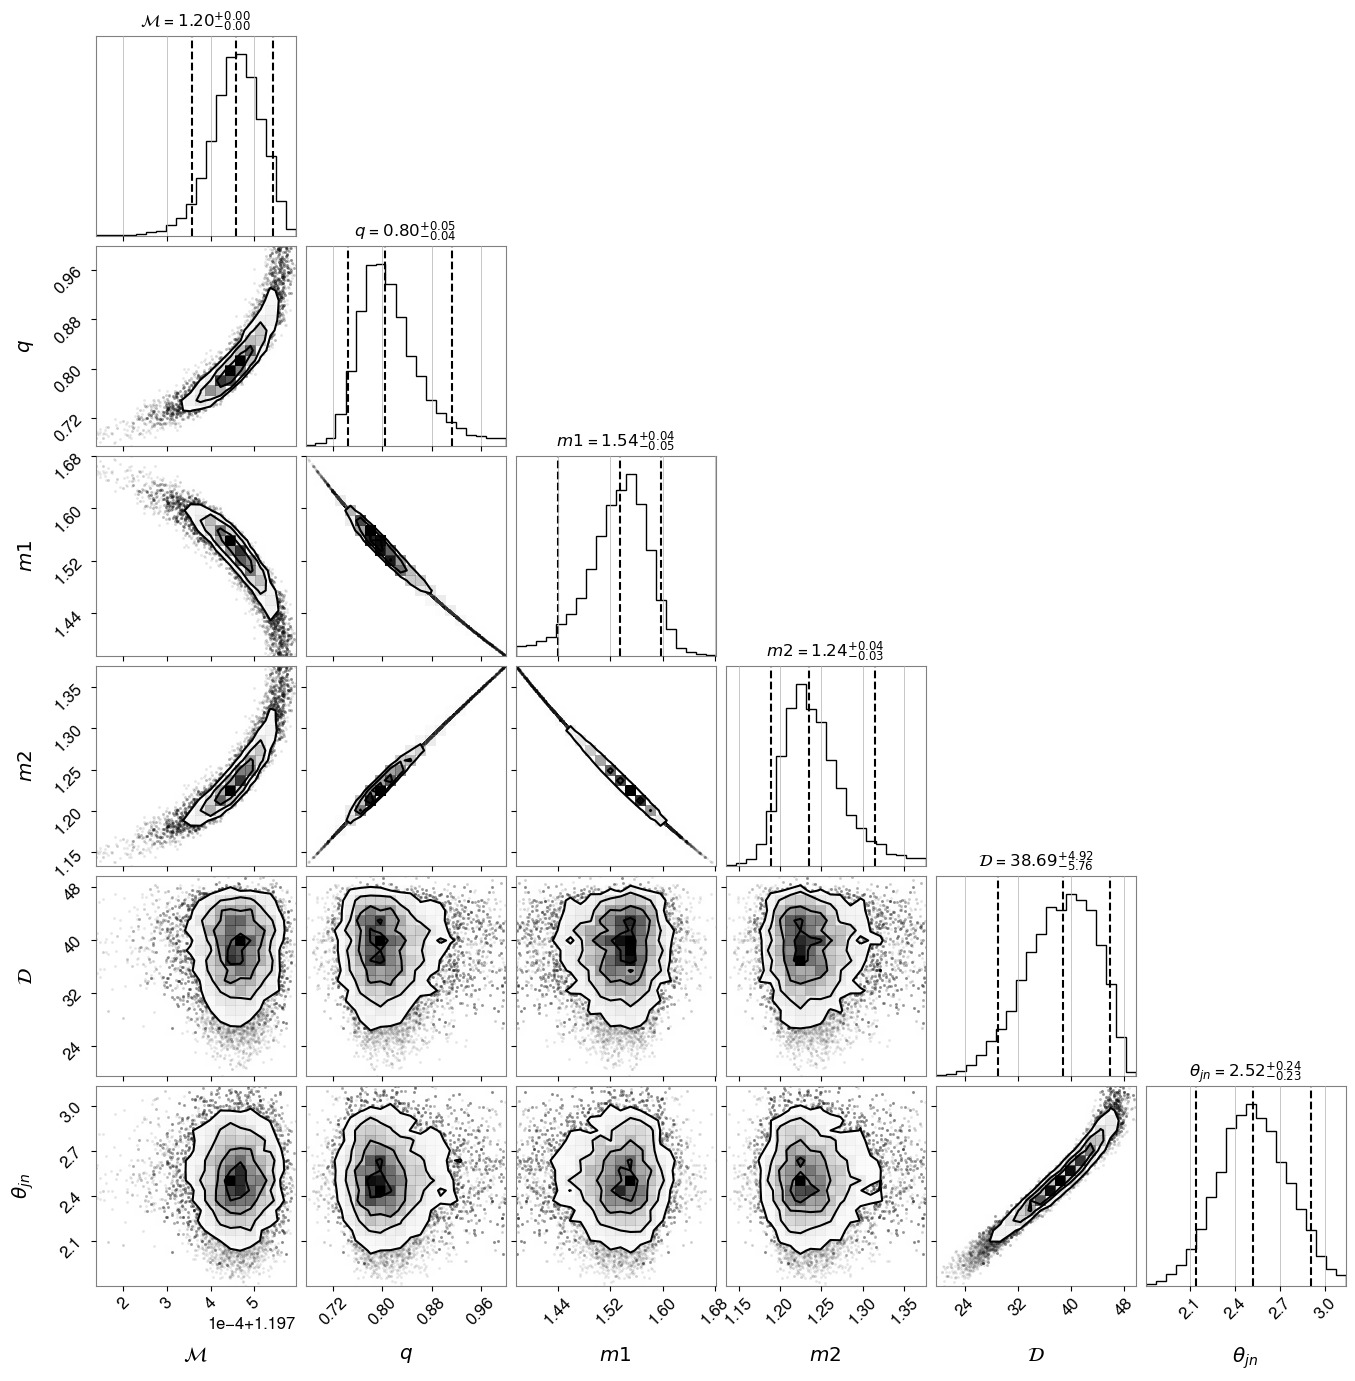

In [70]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
theta_jn2 = result2.posterior["theta_jn"].values
D2 = result2.posterior["luminosity_distance"].values
ra2 = result2.posterior["ra"].values
dec2 = result2.posterior["dec"].values

m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)

data2 = np.transpose(np.array([chirp_mass2,mass_ratio2,m12,m22,D2,theta_jn2]))
figure = corner.corner(data2, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [41]:
result2.log_bayes_factor

848.263652145522

In [31]:
result3_ = h5py.File("IMRPhenomXPHM20Hz_GW170817_data0_1187008882-43_analysis_H1L1V1_result.hdf5", 'r')
result3 = result3_['nested_samples']

In [39]:
np.array(result3_['log_bayes_factor'])

array(854.11637049)

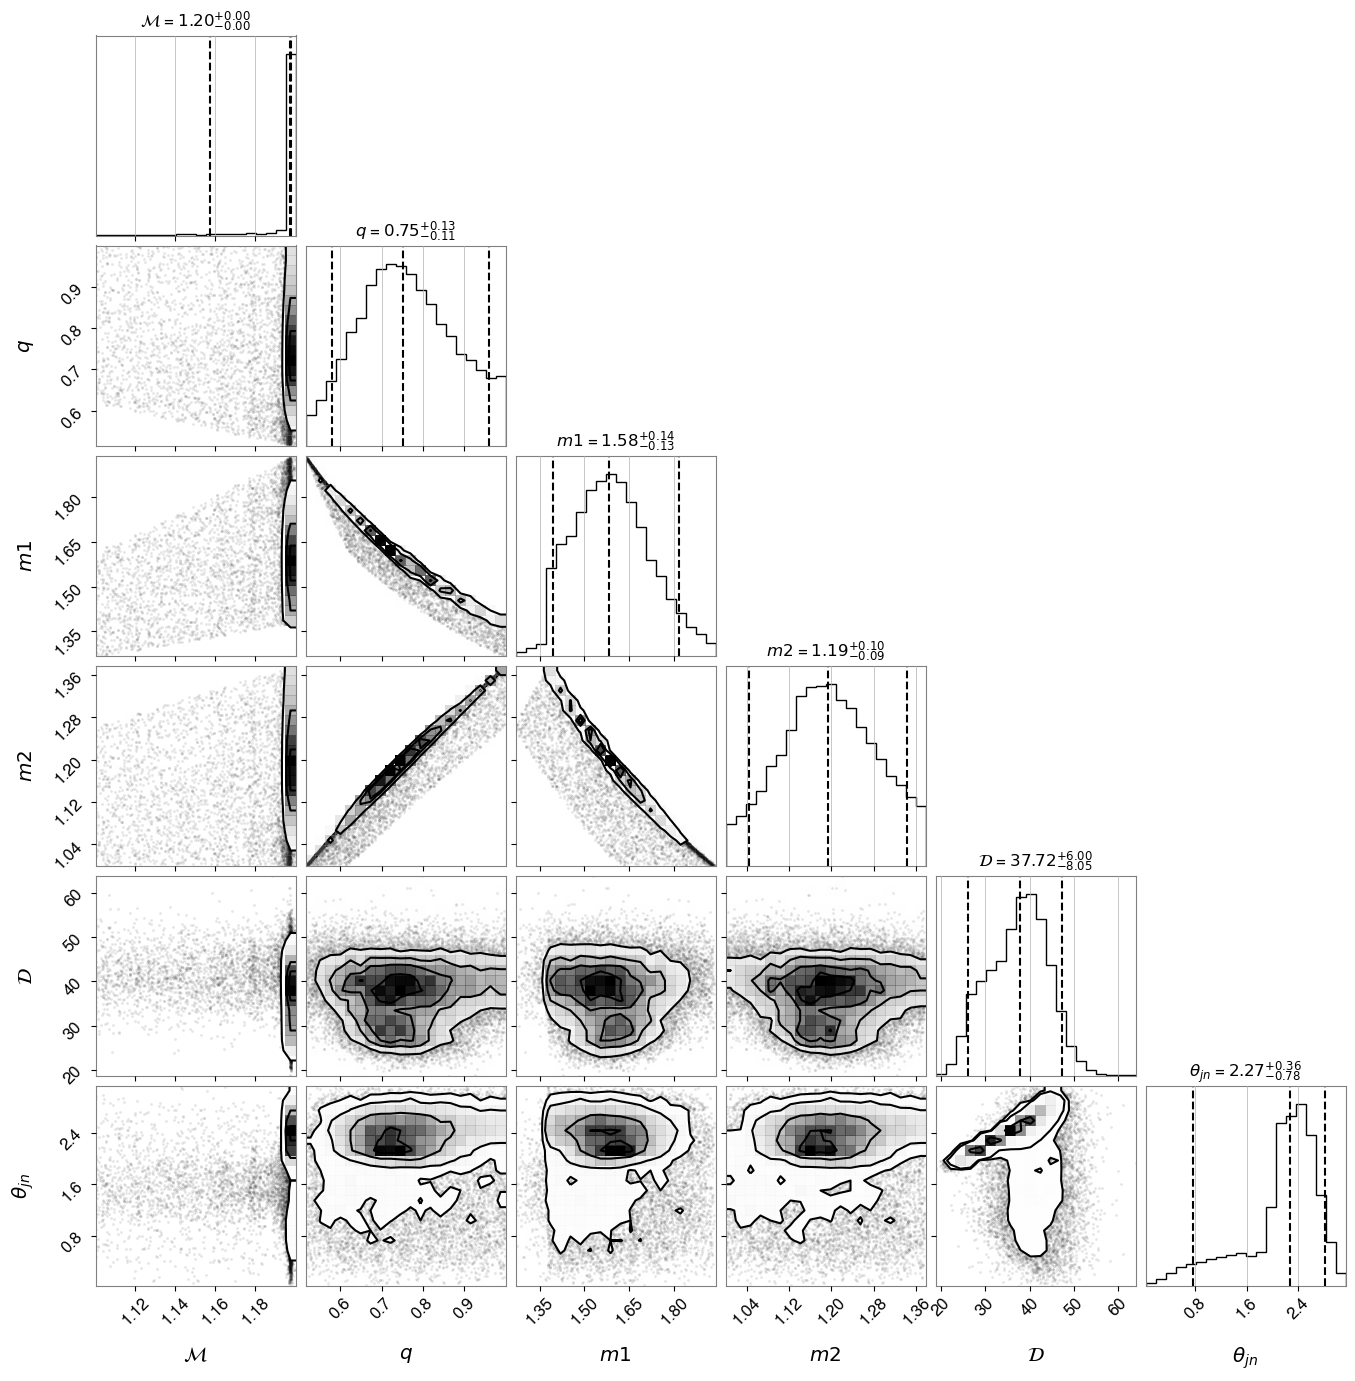

In [71]:
chirp_mass3 = np.array(result3['chirp_mass'])
mass_ratio3 =  np.array(result3['mass_ratio'])
theta_jn3 = np.array(result3['theta_jn'])
D3 = np.array(result3['luminosity_distance'])

m13 = (chirp_mass3*(1+mass_ratio3)**(1/5))/mass_ratio3**(3/5)
m23 = chirp_mass3*mass_ratio3**(2/5)*(1+mass_ratio3)**(1/5)

data3 = np.transpose(np.array([chirp_mass3,mass_ratio3,m13,m23,D3,theta_jn3]))
figure = corner.corner(data3, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [63]:
print(len(chirp_mass1),len(chirp_mass2),len(chirp_mass3))


23830 28107 23408


In [75]:
chirp_mass3 = chirp_mass3[(chirp_mass3>1.35) & (chirp_mass3<1.95)]

In [76]:
print(len(chirp_mass1),len(chirp_mass2),len(chirp_mass3))

23830 28107 0


In [64]:
num = 23408

In [65]:
buffer1 = np.random.choice(chirp_mass1,num)
a1 = np.array([])
b1 = np.array([])
for i in range(num):
    idx1 = np.argwhere(chirp_mass1==buffer1[i])[0,0]
    a1 = np.append(a1,chirp_mass1[idx1])
    b1 = np.append(b1,mass_ratio1[idx1])
    
buffer2 = np.random.choice(chirp_mass2,num)
a2 = np.array([])
b2 = np.array([])
for i in range(num):
    idx2 = np.argwhere(chirp_mass2==buffer2[i])[0,0]
    a2 = np.append(a2,chirp_mass2[idx2])
    b2 = np.append(b2,mass_ratio2[idx2])
    
buffer3 = np.random.choice(chirp_mass3,num)
a3 = np.array([])
b3 = np.array([])
for i in range(num):
    idx3 = np.argwhere(chirp_mass3==buffer3[i])[0,0]
    a3 = np.append(a3,chirp_mass3[idx3])
    b3 = np.append(b3,mass_ratio3[idx3])

In [66]:
data1 = np.transpose(np.array([a1,b1]))
data2 = np.transpose(np.array([a2,b2]))
data3 = np.transpose(np.array([a3,b3]))

In [67]:
CORNER_KWARGS = dict(
    bins=30,
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=16),
    quantiles=[0.05, 0.5, 0.95],
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=True,
    #density=True,
    max_n_ticks=5,
    contourf_kwargs= dict(alpha=0.4),
)
CORNER_KWARGS2 = dict(
    bins=30,
    smooth=0.9,
    #label_kwargs=dict(fontsize=16),
    #title_kwargs=dict(fontsize=16),
    title_quantiles=None,
    quantiles=None,
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    #show_titles=True,
    #density=True,
    #max_n_ticks=3,
)


def overlaid_corner(samples_list, sample_labels):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('tab10', 10 )
    colors = [cmap(i) for i in range(10)]

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        **CORNER_KWARGS,
    )

    for idx in range(1, n):
        fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                #labels=[r"$\mathcal{M}$", r"$q$", r"$m_1$",r"$m_2$",r"$e_0$",r"$\phi_{ref}$"],
                labels=[r"$\mathcal{M}$", r"$q$"],
                color=colors[idx],
                contourf_kwargs= dict(alpha=0.4),
                **CORNER_KWARGS2)
        '''if idx==3: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS)
        else: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS2)'''

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    figure = plt.gcf()
    figure.set_size_inches(7, 7)
    plt.savefig("corner4.png")
    plt.close()


def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

In [68]:
def main():

    overlaid_corner(
        [data3, data2, data1],
        ["PerAdvFD_0PNAmp","TaylorF2Ecc", "IMRPhenomPv2NRT"]
    )


if __name__ == "__main__":
    main()

In [77]:
result1.log_10_bayes_factor

370.31433330415314

In [78]:
result2.log_10_bayes_factor

368.39622332589965

In [79]:
370.31433330415314-368.39622332589965

1.918109978253483